# 8 機械学習の基礎

In [1]:
# 途中で使用するため、あらかじめ読み込んでおいてください。
# データ加工・処理・分析モジュール
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series,DataFrame
import pandas as pd

# 可視化モジュール
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習モジュール
import sklearn

# データ取得用
import requests, zipfile
from io import StringIO
import io

# 小数第３まで表示
%precision 3

'%.3f'

## 8.2 教師あり学習

## 8.2.1 重回帰分析

In [2]:
# url 
auto_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
s = requests.get(auto_data_url).content
auto_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
auto_data.columns =["symboling","normalized-losses","make","fuel-type"
                     ,"aspiration","num-of-doors","body-style","drive-wheels","engine-location","wheel-base","length"
                   ,"width","height","curb-weight","engine-type","num-of-cylinders","engine-size","fuel-system"
                    ,"bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [6]:
for col_name in auto_data.columns:
    print(col_name,sum(auto_data[col_name].isin(['?'])))

symboling 0
normalized-losses 41
make 0
fuel-type 0
aspiration 0
num-of-doors 2
body-style 0
drive-wheels 0
engine-location 0
wheel-base 0
length 0
width 0
height 0
curb-weight 0
engine-type 0
num-of-cylinders 0
engine-size 0
fuel-system 0
bore 4
stroke 4
compression-ratio 0
horsepower 2
peak-rpm 2
city-mpg 0
highway-mpg 0
price 4


In [11]:
sub_auto_data = auto_data[['price','horsepower','width', 'height']]
sub_auto_data = sub_auto_data.replace('?', np.nan).dropna()
sub_auto_data['price'] = pd.to_numeric(sub_auto_data['price'])
sub_auto_data['horsepower'] = pd.to_numeric(sub_auto_data['horsepower'])

In [12]:
sub_auto_data.head()

,price,horsepower,width,height
0,13495,111,64.1,48.8
1,16500,111,64.1,48.8
2,16500,154,65.5,52.4
3,13950,102,66.2,54.3
4,17450,115,66.4,54.3


In [13]:
sub_auto_data.corr()

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
l_model = linear_model.LinearRegression()
X = sub_auto_data.drop("price", axis=1)
Y = sub_auto_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
clf = l_model.fit(X_train,y_train)
print("train:", clf.__class__.__name__, clf.score(X_train, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test, y_test))

print(pd.DataFrame({"Name":X.columns, "Coefficients":clf.coef_}).sort_values(by="Coefficients"))
print("Intercept:", clf.intercept_)

train: LinearRegression 0.73335756839
test: LinearRegression 0.737068873813
   Coefficients        Name
0     81.651078  horsepower
2    229.510077      height
1   1829.174506       width
Intercept: -128409.046303


#### 練習問題1

In [35]:
pr1_data = auto_data[['price', 'length', 'engine-size']]
pr1_data = pr1_data.replace('?', np.nan).dropna()
pr1_data['price'] = pd.to_numeric(pr1_data['price'])
Y = pr1_data['price']
X = pr1_data.drop('price', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)
l_model = linear_model.LinearRegression()
clf = l_model.fit(X_train, y_train)
print('train:', clf.__class__.__name__, clf.score(X_train, y_train))
print('test:', clf.__class__.__name__, clf.score(X_test, y_test))
print(pd.DataFrame({'Name':X.columns, 'Coefficients':clf.coef_}).sort_values(by='Coefficients'))
print('Intercept:', clf.intercept_)

train: LinearRegression 0.770736371407
test: LinearRegression 0.763418675554
   Coefficients         Name
1    120.273905  engine-size
0    179.544547       length
Intercept: -33590.4109916


### 8.2.2 ロジスティック回帰

In [39]:
# データの読み込み
adult_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
s=requests.get(adult_data_url).content
adult_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)
adult_data.columns =["age","workclass","fnlwgt","education"
                     ,"education-num","marital-status","occupation"
                     ,"relationship","race","sex","capital-gain"
                     ,"capital-loss","hours-per-week","native-country","flg-50K"]

In [40]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
flg-50K           32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [62]:
adult_data.groupby("flg-50K").size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [68]:
adult_data["fin_flg"] = [1 if i==" <=50K" else 0 for i in adult_data["flg-50K"]]

In [69]:
adult_data.groupby("fin_flg").size()

fin_flg
0     7841
1    24720
dtype: int64

In [77]:
# ロジスティック回帰
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = adult_data[["age","fnlwgt","education-num","capital-gain","capital-loss"]]
Y = adult_data["fin_flg"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

# 標準化
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

l_model= linear_model.LogisticRegression()
clf = l_model.fit(X_train_std, y_train)
print("train;", clf.__class__.__name__, clf.score(X_train_std, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test_std, y_test))
print(clf.coef_)

train; LogisticRegression 0.810565110565
test: LogisticRegression 0.81014679688
[[-0.533 -0.025 -0.839 -2.287 -0.287]]


### 8.2.3 正則化、ラッソ回帰、リッジ回帰

In [91]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
Y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0, stratify = cancer.target)

l_model = linear_model.LinearRegression()
r_model = linear_model.Ridge()

for model in [l_model, r_model]:
    clf = model.fit(X_train, y_train)
    print("train:", clf.__class__.__name__, clf.score(X_train, y_train))
    print("test:", clf.__class__.__name__, clf.score(X_test, y_test))

train: LinearRegression 0.781333144845
test: LinearRegression 0.749935055996
train: Ridge 0.74952090761
test: Ridge 0.720967160862


### 8.2.4 決定木

In [4]:
# url 
mush_data_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s=requests.get(mush_data_url).content

mush_data = pd.read_csv(io.StringIO(s.decode('utf-8')),header=None)

mush_data.columns =["classes","cap_shape","cap_surface","cap_color","odor","bruises",
                    "gill_attachment","gill_spacing","gill_size","gill_color","stalk_shape",
                   "stalk_root","stalk_surface_above_ring","stalk_surface_below_ring",
                    "stalk_color_above_ring","stalk_color_below_ring","veil_type","veil_color",
                    "ring_number","ring_type","spore_print_color","population","habitat"]

mush_data.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [11]:
mush_data_dummy = pd.get_dummies(mush_data[['gill_color','gill_attachment','odor','cap_color']])
mush_data_dummy['flg'] = mush_data['classes'].apply(lambda x:1 if x=='p' else 0)
mush_data_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [13]:
# データの分類
from sklearn.model_selection import train_test_split
# 決定木
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

X = mush_data_dummy.drop('flg', axis=1)
Y = mush_data_dummy['flg']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=0)

tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf = tree_model.fit(X_train, y_train)
print('train:', clf.__class__.__name__, clf.score(X_train, y_train))
print('test:', clf.__class__.__name__, clf.score(X_test, y_test))

train: DecisionTreeClassifier 0.878877400295
test: DecisionTreeClassifier 0.890694239291


### 2.6.5 k-近傍法

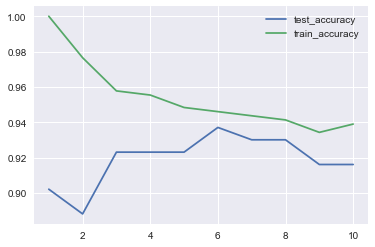

In [35]:
# k-NN 
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import  KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=66)

n_range = range(1,11)
scores_test = []
scores_train = []
for i in n_range:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    clf = knn_model.fit(X_train, y_train)
    scores_train.append(clf.score(X_train, y_train))
    scores_test.append(clf.score(X_test, y_test))
plt.plot(n_range, scores_test, label='test_accuracy')
plt.plot(n_range, scores_train, label='train_accuracy')
plt.legend()
plt.grid(True)

### 8.2.6 サポートベクターマシン

In [2]:
# SVM
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state=0)

svm_model = LinearSVC()
clf = svm_model.fit(X_train, y_train)
print("train:", clf.__class__.__name__, clf.score(X_train, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test, y_test))

train: LinearSVC 0.840375586854
test: LinearSVC 0.825174825175


In [4]:
# 標準化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

svm_model = LinearSVC()
clf = svm_model.fit(X_train_std, y_train)
print("train:", clf.__class__.__name__, clf.score(X_train_std, y_train))
print("test:", clf.__class__.__name__, clf.score(X_test_std, y_test))

train: LinearSVC 0.992957746479
test: LinearSVC 0.951048951049


## 8.3 教師なし学習

### 8.3.1 クラスタリング

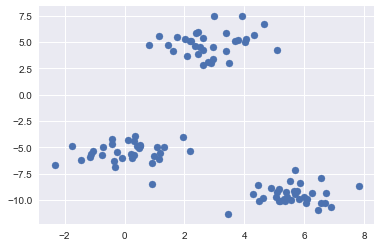

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=10)

plt.scatter(X[:,0], X[:,1])

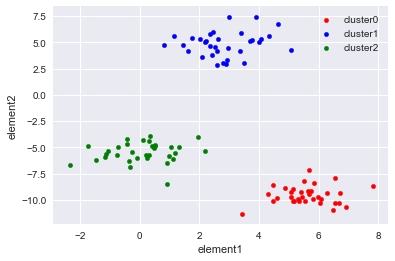

In [19]:
kmeans = KMeans(init='random', n_clusters=3)
kmeans.fit(X)

y_pre = kmeans.fit_predict(X)

merge_data = pd.concat([pd.DataFrame(X[:,0]),pd.DataFrame(X[:,1]),pd.DataFrame(y_pre)], axis=1)
merge_data.columns = ['element1', 'element2', 'cluster']

cluster_0 = merge_data[merge_data['cluster']==0]
cluster_1 = merge_data[merge_data['cluster']==1]
cluster_2 = merge_data[merge_data['cluster']==2]

ax = cluster_0.plot.scatter(x='element1', y='element2', color='red', label='cluster0')
cluster_1.plot.scatter(x='element1', y='element2', color='blue', label='cluster1', ax=ax)
cluster_2.plot.scatter(x='element1', y='element2', color='green', label='cluster2', ax=ax)

In [22]:
banking_c_data = pd.read_csv("chap8/bank-full.csv",sep=";")
banking_c_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


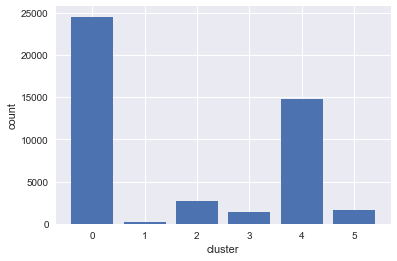

In [31]:
banking_c_data_sub=banking_c_data[['age','balance','campaign','previous']]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(banking_c_data_sub)
X_std = sc.transform(banking_c_data_sub)

# 予測 
kmeans = KMeans(init='random', n_clusters=6, random_state=0)
kmeans.fit(X_std)

# 予測ラベル集計
labels = kmeans.labels_
label_data = pd.DataFrame(labels,columns=["cl_nm"])
label_data_bycl = label_data.groupby('cl_nm').size()

# グラフ化
plt.bar([0,1,2,3,4,5], label_data_bycl.values)
plt.xlabel('cluster')
plt.ylabel('count')
plt.grid(True)